In [34]:
# %matplotlib notebook
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import re

# Image Pull Time Graphs
Get the (real) pull times from each benchmark and put them in the `realtimes` list

In [35]:
containers = ["native", "ccontainer", "ccontainer-internal", "docker"]
realtimes = [17.997, 18.505, 18.310, 4.485]

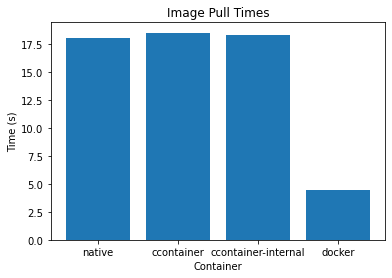

In [36]:
plt.figure()
plt.title("Image Pull Times")
plt.ylabel("Time (s)")
plt.xlabel("Container")
plt.bar(containers, realtimes)
plt.xticks(rotation=0)
plt.show()

# Startup Time Graphs
Times can be separated from their respective files by running the `get_times.sh` script, then copy-pasting the results to their respective variables as multiline strings. `get_times.sh` has the following syntax:
```
./get_times.sh <path_to_file> <key1> ... <keyn>
```
where `path_to_file` is the path from the current directory to the target file (e.g. `results/docker_startup.txt`) and `key1` through `keyn` are the keys on which to separate out lines (e.g. `real`, `user`, `sys`)

In [37]:
timestolist = lambda longstr: [float(re.search("(?<=m)(.*?)(?=s)", l).group(0)) for l in longstr.splitlines()]

In [38]:
docker_realtimes = '''0m0.521s
0m0.441s
0m0.464s
0m0.438s
0m0.450s
0m0.461s
0m0.481s
0m0.463s
0m0.460s
0m0.445s
'''
docker_usertimes = '''0m0.018s
0m0.016s
0m0.024s
0m0.014s
0m0.015s
0m0.013s
0m0.024s
0m0.023s
0m0.015s
0m0.018s
'''
docker_systimes = '''0m0.024s
0m0.026s
0m0.029s
0m0.023s
0m0.034s
0m0.035s
0m0.027s
0m0.027s
0m0.027s
0m0.030s
'''
ccontainer_realtimes = '''0m0.175s
0m0.157s
0m0.155s
0m0.154s
0m0.165s
0m0.166s
0m0.151s
0m0.156s
0m0.162s
0m0.165s
'''
ccontainer_usertimes = '''0m0.002s
0m0.005s
0m0.004s
0m0.003s
0m0.002s
0m0.003s
0m0.001s
0m0.004s
0m0.002s
0m0.005s
'''
ccontainer_systimes = '''0m0.038s
0m0.033s
0m0.032s
0m0.034s
0m0.040s
0m0.047s
0m0.033s
0m0.032s
0m0.040s
0m0.033s
'''
ccontainerinternal = '''0.116533
0.107791
0.103029
0.104343
0.103801
0.110010
0.096274
0.104224
0.109497
0.108052
'''

In [39]:
timetypes = ["real", "user", "sys"]
dockertimes = { t: timestolist(s) for t, s in zip(timetypes, [docker_realtimes, docker_usertimes, docker_systimes])}
ccontainertimes = { t: timestolist(s) for t, s in zip(timetypes, [ccontainer_realtimes, ccontainer_usertimes, ccontainer_systimes])}
ccontainerinternal = [float(l.strip()) for l in ccontainerinternal.splitlines()]
print(ccontainerinternal)

[0.116533, 0.107791, 0.103029, 0.104343, 0.103801, 0.11001, 0.096274, 0.104224, 0.109497, 0.108052]


,real,user,sys
ccontainer,0.1606,0.0031,0.0362
docker,0.4624,0.0180,0.0282


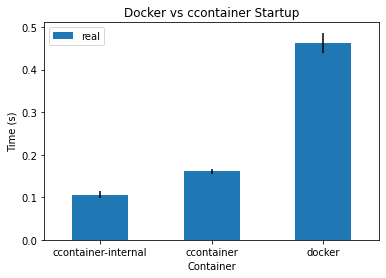

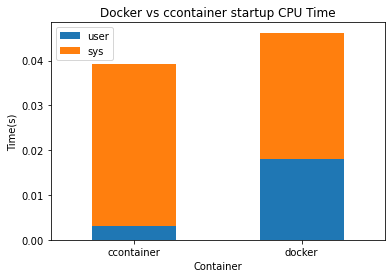

In [40]:
ddf = pd.DataFrame(dockertimes)
cdf = pd.DataFrame(ccontainertimes)
# ddf.mean().plot(kind='bar', yerr=ddf.std())
# df.std()
combined = pd.DataFrame([cdf.mean().T, ddf.mean().T], ["ccontainer", "docker"])
# combined.plot.bar(y=["real"], yerr=[ddf.std().iloc[0], cdf.std().iloc[0]], title="Docker vs ccontainer Startup", ylabel="Time (s)", xlabel="Container", rot=0)
realtimes = pd.concat([pd.DataFrame({"real" : [np.mean(ccontainerinternal)]}, ["ccontainer-internal"]), combined["real"]])
realtimes.plot.bar(yerr=[cdf.std().iloc[0], np.std(ccontainerinternal), ddf.std().iloc[0]], title="Docker vs ccontainer Startup", ylabel="Time (s)", xlabel="Container", rot=0)
combined.plot.bar(y=["user", "sys"], stacked=True, title="Docker vs ccontainer startup CPU Time", ylabel="Time(s)", xlabel="Container", rot=0)
combined

# Disk Performance Graphs
Simply copy and paste the throughputs to their appropriate locations

In [41]:
containers = ["native", "ccontainer", "docker"]
throughputs = [27.7, 28.8, 39.2]

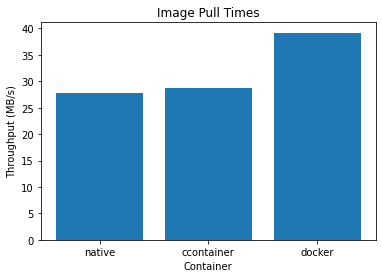

In [42]:
plt.figure()
plt.title("Image Pull Times")
plt.ylabel("Throughput (MB/s)")
plt.xlabel("Container")
plt.bar(containers, throughputs)
plt.xticks(rotation=0)
plt.show()